In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Curso Data Science: Proyecto Final
### IMDB NETFLIX Proyect


## EQUIPO: 
* Matias Frano
* Sabrina Mancuso

# Descripción del Caso de Negocio

Somos un estudio de Producción y antes de presentar nuestro proyecto queremos saber si el mismo es apto para Netflix en base al éxito de las producciones en la plataforma.

# El Problema

Para entender el conjunto de datos, vamos a estudiar cada variable respecto al problema. Nuestro objetivo es predecir que tipo de peliculas serian exitosas en la plataforma de Netflix.

* Conocer qué tipo de peliculas se encuentran dentro del top 10 (incluye producciones independientes, Producciones de Otros Estudios, o de Netflix).
* También se va a discriminar al público al que va dirigido (ejemplo: atp, etc.)
* Conocer si de ese top 10, son estrenos o reestrenos de viejos éxitos?
* Al relevar estos datos, además, podremos determinar si para Netflix, le es ventajoso invertir en nuevos desarrollos o simplemente comprar derechos de viejos exitosos o de exitos vigentes de otros estudios? Este es el primer punto que analizaremos.
* En base a lo relevado, generaremos un análisis para responder que tipo de producciones son las que les permite crecer en la plataforma.

# 1. Proceso de análisis exploratorio de datos (EDA):

##Datos/Campos Clave

* **Title** : Titulo de la Serie, es importante por que nos permite saber el nombre de los titulos que le brindaron mayores ganancias o perdidas a netflix.
* **Date** (en todos los datasets): Fecha, dato clave para poder cruzar con los otros datasets, y ver como afecto al comportamiento de los subscriptores, acciones, y top 10.
* **Country** : Los campos de Pais, nos permiten conocer, si los estrenos comunes, top 10 afectan a nivel mundial o solo de forma sectorial (tomando en cuenta los estrenos globales o por regiones).
* **Price USD** / **Price Per Title** : Estos campos son importantes, por que nos da una proporcion, del valor de Netflix por Pais y por Pelicula, proporcionando una medida de que incidencia tiene en el valor de las aciones (volumen/porcentual/cantidad).
* **Open** / **Close** / **Volume** : Estos 3 campos, son importantes por que nos brindan conocimiento de si el valor de Netflix fue afectado, por los estrenos, top 10 o subscriptores y como incidio cada pais.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import spacy
from wordcloud import WordCloud
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#MOVIES CATALOG
Este conjunto de datos combina fuentes de datos de Netflix, Rotten Tomatoes y IMDB.
Los campos mas importantes son:
* **Title** : Titulo de la Pelicula
* **Genre** : Para evaluar que genero es esa pelicula del top 10.
* **Series or Movie** : Para dividir, el top 10.
* **IMDb Score** : Puntuación de la Pelicula
* **Release Date**: En el Top 10, son peliculas nuevas o viejas las que son relevantes.
* **Production House** : Permite saber si las producciones propias son las que tienen exito.

In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/TP CODERHOUSE DATASCIENCE/ENTREGAS/DATASETS/rotten - netflix/netflix-rotten-tomatoes-metacritic-imdb.csv')
df = imdb.copy()

In [ ]:
imdb.head(3)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube


In [ ]:
imdb.shape

(15480, 29)

In [ ]:
imdb.columns = [c.replace(' ', '_') for c in imdb.columns]
imdb.head()

,Title,Genre,Tags,Languages,Series_or_Movie,Hidden_Gem_Score,Country_Availability,Runtime,Director,Writer,...,Netflix_Release_Date,Production_House,Netflix_Link,IMDb_Link,Summary,IMDb_Votes,Image,Poster,TMDb_Trailer,Trailer_Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


##Agregando Campos de Fechas para los analisis posteriores

In [ ]:
imdb["Date"] = pd.to_datetime(imdb.Netflix_Release_Date)
imdb["Year"] = imdb["Date"].dt.year
imdb["Month"] = imdb["Date"].dt.month
imdb["day_of_week"] = imdb["Date"].dt.dayofweek
imdb["Year_Month"] = imdb["Date"].dt.strftime("%Y-%m")
imdb.head()

,Title,Genre,Tags,Languages,Series_or_Movie,Hidden_Gem_Score,Country_Availability,Runtime,Director,Writer,...,IMDb_Votes,Image,Poster,TMDb_Trailer,Trailer_Site,Date,Year,Month,day_of_week,Year_Month
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN,2021-03-04,2021,3,3,2021-03
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,2021-03-04,2021,3,3,2021-03
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube,2021-03-04,2021,3,3,2021-03
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN,2021-03-04,2021,3,3,2021-03
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN,2021-03-04,2021,3,3,2021-03


In [ ]:
imdb.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series_or_Movie',
       'Hidden_Gem_Score', 'Country_Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View_Rating', 'IMDb_Score',
       'Rotten_Tomatoes_Score', 'Metacritic_Score', 'Awards_Received',
       'Awards_Nominated_For', 'Boxoffice', 'Release_Date',
       'Netflix_Release_Date', 'Production_House', 'Netflix_Link', 'IMDb_Link',
       'Summary', 'IMDb_Votes', 'Image', 'Poster', 'TMDb_Trailer',
       'Trailer_Site', 'Date', 'Year', 'Month', 'day_of_week', 'Year_Month'],
      dtype='object')

##Evaluando Generos

In [ ]:
imdb.Genre.nunique()

1780

In [ ]:
imdb.Genre.unique()

array(['Crime, Drama, Fantasy, Horror, Romance', 'Comedy',
       'Drama, Thriller', ..., 'Action, Animation, Comedy, Romance',
       'Animation, Action, Adventure, Fantasy, Sport, Thriller',
       'Adventure, Drama, Fantasy, Romance, Thriller'], dtype=object)

###TOP 10 GENEROS

In [ ]:
top_10_imdb_genre = imdb.Genre.value_counts().nlargest(10)
fig = px.bar(data_frame=top_10_imdb_genre, x=top_10_imdb_genre.index, y=top_10_imdb_genre.values, labels={"y":"Cantidad de Peliculas", "index":"Genero"})
fig.update_layout(xaxis={"categoryorder":"total descending"})
fig.show()

###DURACION DE PROGRAMAS

In [ ]:
fig = px.histogram(data_frame=imdb, x="Runtime", title="Duración de los Programas")
fig.show()

###BOX PLOT DE DURACION DE PROGRAMAS

In [ ]:
fig = px.box(data_frame=imdb, x="Runtime", hover_data=imdb[["Genre"]])
fig.update_traces(overwrite=True)
fig.show()

###ANALIZANDO SCORE IMDB

In [ ]:
imdb["IMDb_Score"].describe()

count    13381.000000
mean         6.496054
std          1.146910
min          1.000000
25%          5.800000
50%          6.600000
75%          7.300000
max          9.700000
Name: IMDb_Score, dtype: float64

###HISTOGRAMA CON PUNTAJE X CANTIDAD DE PROGRAMAS

In [ ]:
fig = px.histogram(data_frame=imdb, x=imdb["IMDb_Score"], title="IMDB Scores of the Programs")
fig.show()

###BOXPLOT CON DISTRIBUCION DE PUNTAJE

In [ ]:
fig = px.box(data_frame=imdb, x=imdb["IMDb_Score"], hover_data=imdb[["Title", "Genre"]])
fig.update_traces(overwrite=False)
fig.show()

###ANALIZANDO SCORE

In [ ]:
imdb[imdb["IMDb_Score"] == imdb["IMDb_Score"].max()][["Title", "Genre"]]

,Title,Genre
293,No Festival,"Documentary, Music"


In [ ]:
imdb[imdb["IMDb_Score"] == imdb["IMDb_Score"].min()][["Title", "Genre"]]

,Title,Genre
10933,Be with You,Short


In [ ]:
imdb[["IMDb_Score", "Runtime"]].corr()

,IMDb_Score
IMDb_Score,1.0


###SCORE SEGMENTADO POR TIEMPO

In [ ]:
fig = px.scatter(data_frame=imdb, x="IMDb_Score", y="Runtime")
fig.update_layout(autosize=False, width=800, height=600,)
fig.show()

###CANTIDAD DE PROGRAMAS POR AÑO

In [ ]:
year = imdb.Year.value_counts()

fig = px.bar(data_frame=imdb, x=year.index, y=year.values, labels={"y":"Movies", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

###TOP 10 DE MEJORES PROGRAMAS

In [ ]:
top_10_ratings = imdb[["IMDb_Score", "Title", "Genre", "Year", "Languages", "Production_House" ]].sort_values(["IMDb_Score"], ascending=False)[:10]
fig = px.scatter(top_10_ratings, y='Title', x='IMDb_Score', hover_data = top_10_ratings[['Genre','Year','Languages', 'Production_House']], color='Genre', title = "Top 10 Programas y series Mejor Puntuados")
fig.show()

##Peliculas vs Series

Comprobamos si hay valores faltantes y cuántos;

In [ ]:
df.isnull().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

Como podemos ver, hay muchos valores faltantes, por lo decidimos mantener las columnas más importantes para el análisis.

In [ ]:
df = df.drop(columns = [ 'Metacritic Score', 'Boxoffice', 'Production House', 'Netflix Link', 'IMDb Link',
        'Poster', 'TMDb Trailer', 'Trailer Site'], axis = 1)

Ahora que tenemos 2 funciones ('Fecha de lanzamiento' y 'Fecha de lanzamiento de Netflix') que indican una fecha como tipo de datos de objeto, las transformamos en funciones de fecha y hora para que podamos usarlas como fechas reales.

In [ ]:
df['Release Date']= pd.to_datetime(df['Release Date'])
df['Netflix Release Date']= pd.to_datetime(df['Netflix Release Date'])

Creamos 2 nuevas funciones una para el año de lanzamiento y otra para el año de lanzamiento en Netflix.

In [ ]:
df['Released_Year'] = pd.DatetimeIndex(df['Release Date']).year
df['Released_Year_Net'] = pd.DatetimeIndex(df['Netflix Release Date']).year

In [ ]:
df.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image,Released_Year,Released_Year_Net
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,74.0,57.0,2008-12-12,2021-03-04,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0,2021


Las dos grandes macro categorías de productos que podemos encontrar en el catálogo de Netflix son Películas y Series de TV, conociendo la presencia de estas dos macro categorías, veamos cuáles de las dos está más presente en el catálogo de productos de Netflix.

In [ ]:
colors = ['black',] * 2
colors[0] = 'crimson'

count = df['Series or Movie'].value_counts()

fig = go.Figure(data=[go.Bar(
    x = df["Series or Movie"],
    y = count,
    text = count,
    textposition='auto',
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Mas Peliculas 📽‍️ o Series 📺?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  barmode='group', xaxis_tickangle=-45,
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Category',
                  titlefont_size=14))

Como puede verse en el gráfico de barras, hay una gran diferencia entre las dos categorías, ya que hay casi 12 mil series de televisión frente a solo 3,8 películas.

# Generos

Después comprobar esta gran diferencia entre las dos categorías, podemos dividir nuestro marco de datos en dos para poder trabajar y analizar las Series de TV y las Películas de forma distinta.

En base a eso vamos analizar qué géneros son los principales para películas y series

In [ ]:
df_movie = df[df['Series or Movie']=='Movie']

In [ ]:
df_movie.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image,Released_Year,Released_Year_Net
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,79.0,1.0,NaN,2020-05-08,2021-03-04,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,2020.0,2021


In [ ]:
df_series = df[df["Series or Movie"] == "Series"]

In [ ]:
df_series.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image,Released_Year,Released_Year_Net
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,74.0,57.0,2008-12-12,2021-03-04,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,2008.0,2021


In [ ]:
df_series_gen = df_series.dropna(subset=['Genre'])

In [ ]:
colors_10 = ['DarkRed', 'FireBrick','Red', 'Crimson', 'IndianRed', 'slategray', 'gray', 'dimgrey', 'DarkSlateGrey', 'black']
series_gen_list = df_series_gen.Genre.str.split(',') #split the list into names
s_gen_list = {} #create an empty list
for genres in series_gen_list: # for any names in series_gen_list
    for genre in genres: # for any genre in genres
        if (genre in s_gen_list): #if this genre is already present in the s_gen_list
            s_gen_list[genre]+=1 # increase his value
        else:  # else
            s_gen_list[genre]=1 # Create his index in the list
s_gen_df = pd.DataFrame(s_gen_list.values(),index = s_gen_list.keys(),
                        columns = {'Counts of Genres in Tv Series'}) #Create a s_gen_df
s_gen_df.sort_values(by = 'Counts of Genres in Tv Series',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_s_gen = s_gen_df[0:10] 

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_s_gen.index,
    y = top_10_s_gen['Counts of Genres in Tv Series'],
    text = top_10_s_gen['Counts of Genres in Tv Series'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Cuales son los Generos mas Populares en las Series?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='CANTIDAD',
                  titlefont_size=14),
                  xaxis=dict(
                  title='GENEROS',
                  titlefont_size=14))

In [ ]:
df_movie_gen = df_movie.dropna(subset=['Genre'])

In [ ]:
movie_gen_list = df_movie_gen.Genre.str.split(', ') #split the list into names
m_gen_list = {} #create an empty list
for genres in movie_gen_list: # for any genres in movie_gen_list
    for genre in genres: # for any genre in genres
        if (genre in m_gen_list): #if this name is already present in the m_gen_list
            m_gen_list[genre]+=1 # increase his value
        else:  # else
            m_gen_list[genre]=1 # Create his index in the list
m_gen_df = pd.DataFrame(m_gen_list.values(),index = m_gen_list.keys(),
                        columns = {'Counts of Genres in Movies'}) #Create a m_gen_df
m_gen_df.sort_values(by = 'Counts of Genres in Movies',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_m_gen = m_gen_df[0:10] 

In [ ]:
fig = go.Figure(data=[go.Bar(
    x = top_10_m_gen.index,
    y = top_10_m_gen['Counts of Genres in Movies'],
    text = top_10_m_gen['Counts of Genres in Movies'],
    textposition='auto',
    marker_color=colors_10 # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'Cuales son los Generos mas Populares para las Peliculas?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='CANTIDAD',
                  titlefont_size=14),
                  xaxis=dict(
                  title='GENEROS',
                  titlefont_size=14))

# ETIQUETAS

Las Etiquetas son las palabras claves asociadas a las películas o series, que permiten la busqueda en la plataforma o la recomendación. Por lo que vamos a analizar si las mismas son representativas en base al análisis de los géneros.

In [ ]:
df_series_tag = df_series.dropna(subset=['Tags'])

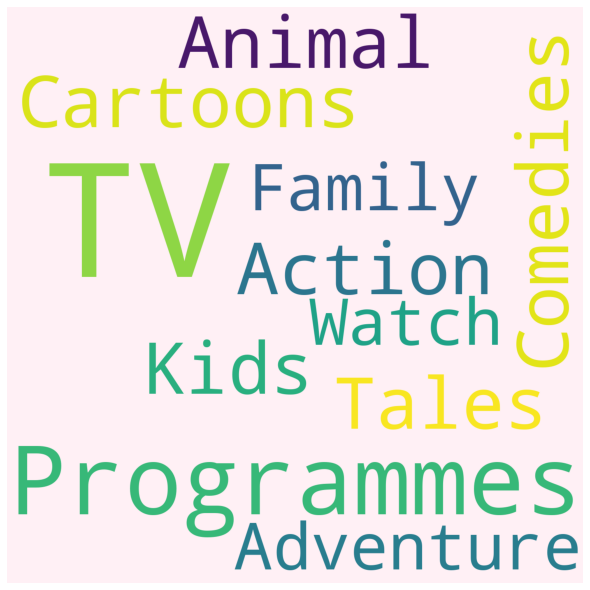

In [ ]:
nlp = spacy.load('en_core_web_sm')
series_tags = df_series_tag['Tags']
for tag in series_tags:
    doc = nlp(tag)
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
rest_string = ' '
for i in words:
   rest_string = rest_string+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 5).generate(rest_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Como podemos observar, la primera palabra con mayor relevancia o peso son: TV, Programas, Comedia, etc. Y estas tienen una fuerte correlacion con lo analizado anteriormente; por lo que podemos concluir que las etiquetas tienen una estrecha relación con el tipo de programa (Serie o Pelicula) y el género.

# REGRESION

In [ ]:
df.isnull().any()

Title                    False
Genre                     True
Tags                      True
Languages                 True
Series or Movie          False
Hidden Gem Score          True
Country Availability      True
Runtime                   True
Director                  True
Writer                    True
Actors                    True
View Rating               True
IMDb Score                True
Rotten Tomatoes Score     True
Metacritic Score          True
Awards Received           True
Awards Nominated For      True
Boxoffice                 True
Release Date              True
Netflix Release Date     False
Production House          True
Netflix Link             False
IMDb Link                 True
Summary                   True
IMDb Votes                True
Image                    False
Poster                    True
TMDb Trailer              True
Trailer Site              True
dtype: bool

In [ ]:
df.fillna(value=0,axis=1,inplace=True)
df.shape

(15480, 29)

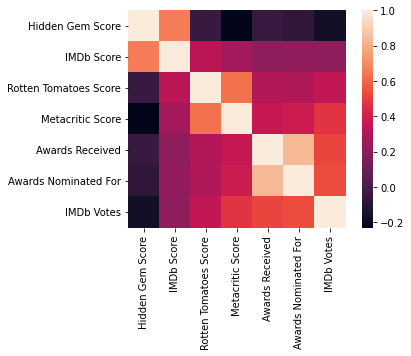

In [ ]:
sns.heatmap(df.corr(), vmax=1, square=True)

In [ ]:
features = ["Hidden Gem Score","Rotten Tomatoes Score", "Metacritic Score", "Awards Received", "Awards Nominated For"]
target = ["IMDb Score"]

In [ ]:
train, test = train_test_split(df,test_size=0.30)
train.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
11510,Princess Mononoke,"Animation, Action, Adventure, Fantasy","Action Sci-Fi & Fantasy,Sci-Fi & Fantasy,Actio...",Japanese,Movie,4.2,"France,South Korea,Russia,Hong Kong,India,Hung...",> 2 hrs,Hayao Miyazaki,"Hayao Miyazaki, Neil Gaiman",...,2016-03-01,"Nippon Herald Films, Studio Ghibli, Dentsu",https://www.netflix.com/watch/28630857,https://www.imdb.com/title/tt0119698,A prince infected with a lethal curse sets off...,345395.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,http://ia.media-imdb.com/images/M/MV5BMjgzNTUw...,https://www.youtube.com/watch?v=4OiMOHRDs14,YouTube
9133,Desperate Sunflowers,Mystery,"Japanese Comedies,Dramas based on a book,Comed...",Japanese,Movie,7.8,Japan,1-2 hour,Hitomi Kuroki,"Nozomi Katsura, Masafumi Nishida",...,2017-12-29,0,https://www.netflix.com/watch/80196838,https://www.imdb.com/title/tt4882930,"Grifter Natsuko reunites with her straitlaced,...",35.0,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...,https://images-na.ssl-images-amazon.com/images...,0,0
2377,Cardinalul,0,"Movies Based on Real Life,Dramas",0,Movie,0.0,Romania,1-2 hour,0,0,...,2021-01-24,0,https://www.netflix.com/watch/81351806,0,"In 1948, Bishop Iuliu Hossu takes a stand when...",0.0,https://occ-0-3017-3466.1.nflxso.net/dnm/api/v...,0,0,0
9969,Finding Mr. Right,"Comedy, Romance","Comedies,Romantic Films,Romantic Comedies,Hong...","Mandarin, English, Min Nan",Movie,7.2,"Russia,India,Hungary,Lithuania,United Kingdom,...",> 2 hrs,Xiaolu Xue,Xiaolu Xue,...,2017-05-05,0,https://www.netflix.com/watch/70295741,https://www.imdb.com/title/tt2169322,A Chinese tycoons mistress flees to Seattle to...,2316.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=doZfHO8f82k,YouTube
5063,Instant Family,"Comedy, Drama","Comedies,Family Cozy Time,US Movies","English, Spanish",Movie,3.5,"South Korea,Portugal,South Africa,Hungary,Hong...",1-2 hour,Sean Anders,"Sean Anders, John Morris",...,2019-08-16,Closest to the Hole,https://www.netflix.com/watch/81018383,https://www.imdb.com/title/tt7401588,Two house flippers are certain they can handle...,89259.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMTkzMz...,https://www.youtube.com/watch?v=IUfZq3DUd3Y,YouTube


In [ ]:
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [ ]:
from sklearn import linear_model
from sklearn import metrics
lin = linear_model.LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)

In [ ]:
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  0.6434977672181301
Testing score:  0.6606982735262903


In [ ]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn_score_train = knn.score(X_test, y_test)
knn_score_test = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)
print("Testing score: ",knn_score_test)

Training score:  0.8873027433141588
Testing score:  0.9211472786364261


#Conclusion de la Regresión

Con Regesion Lineal, supervisada, el resultado esta muy alejado de 1 por lo que el metodo no es suficiente para que luego los datos de entrenamiento pueda arrojar resultados acertivos.
Pero con una regresión no Supervisada por medio de Busqueda de Vecinos (neighbor)los resultados son aceptables.